# Assignment 1.1: Linear Filtering

Welcome back! We're going to get you started on filtering basics, and then let you explore on your own.

In [0]:
!git clone https://github.com/xcyan/cv-ai4all-michigan
!cp -r cv-ai4all-michigan/Images/* . && echo "=== Files Copied ==="

fatal: destination path 'cv-ai4all-michigan' already exists and is not an empty directory.
=== Files Copied ===


In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import cv2 

First, we're going to apply the moving average (box) filter.

Step 1: Read in the "flower.png" image and display it:

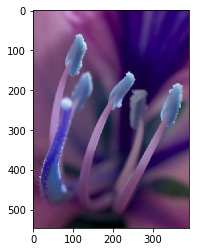

In [0]:
# Load a color image
img = cv2.imread('flower.png',1)
plt.imshow(img)
plt.show()


Step 2: Let's try applying the box filter to this image. We'll do it in two ways: first, let's use the OpenCV implementation. We'll use a larger kernel (9x9) so that you can see it clearly. 

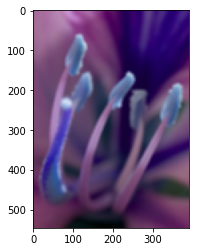

In [0]:
blur = cv2.blur(img,(9,9))
plt.imshow(blur)
plt.show()

Step 3: Now, let's implement that same filter as a matrix, and then apply it using OpenCV tools. 

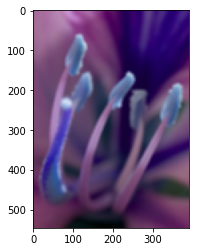

In [0]:
our_kernel = np.ones((9,9),np.float32)/(9*9)
# our_kernel = pass

blur2 = cv2.filter2D(img,-1,our_kernel)
plt.imshow(blur2)
plt.show()

Step 4: As a sanity check, let's visualize the difference between the two blurred images. There should be no difference!

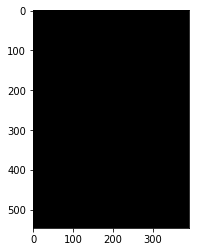

In [0]:
blur_difference = blur2 - blur
plt.imshow(blur_difference)
plt.show()

Step 5: To be doubly sure, let's sum the difference at each pixel value and print it. 

In [0]:
difference_sum = blur_difference.sum()
print(difference_sum)

0


## Complete the following tasks: 

We'll come back to the flower picture. For now, let's read in the image "cameraman.png" and try to de-noise it:

1. Use the OpenCV implementation of Gaussian blurring and try to denoise the cameraman image. 

2. Use filters to shift the image to the right by 10 pixels. 

3. There are other useful filters. See https://en.wikipedia.org/wiki/Kernel_(image_processing) for a (very) small sample. 
Now, look up the Sobel filter and implement one in the x-direction.

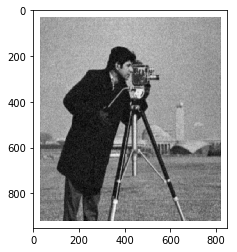

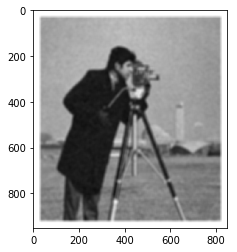

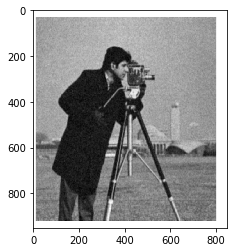

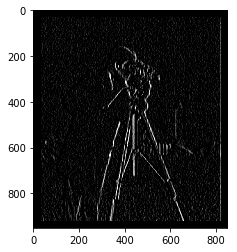

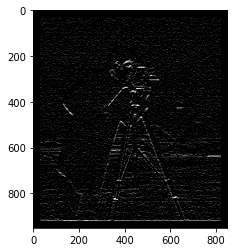

In [0]:
## To be removed for actual assignment 
img = cv2.imread('cameraman.png',1)
plt.imshow(img)
plt.show()

# Gaussian Blurring
gauss = cv2.GaussianBlur(img, (15,15), 10)
plt.imshow(gauss)
plt.show()

# Image Shifting 
direction = -1 # 0 if right, -1 if left 
k = 20

shift = np.zeros((1, 2*k + 1), dtype=np.float32)
shift[0, direction] = 1.
img_shifted = cv2.filter2D(src=img, ddepth=-1, kernel=shift)
plt.imshow(img_shifted)
plt.show()

# Sobel Filtering
k = 3
d = 1

sobelx = cv2.Sobel(img,-1,d,0,ksize=k)
sobely = cv2.Sobel(img,-1,0,d,ksize=k)

plt.imshow(sobelx)
plt.show()
plt.imshow(sobely)
plt.show()


## Challenge tasks:



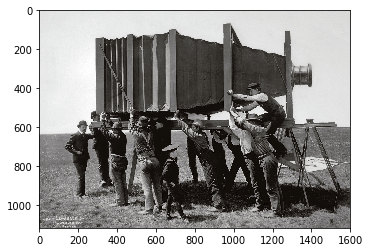

In [0]:
img = cv2.imread('lawrence_camera.jpg',1)
plt.imshow(img)
plt.show()

**Challenge 1**

The picture above is said to be of the world's first camera. But wait, who took that picture then? 

The picture was actually taken in 1900 of the World's largest camera which was built by George R. Lawrence. Lawrence was commisioned by Chicago & Alton Railway to take photographs of their newest train: the Alton Limited Locomotive. The camera weighed 1400 pounds and required 15 men to operate it. Lawrence's pictures won the Grand Prize of the World for Photographic Excellence at the Exposition Universelle, the world’s fair in Paris in 1900. (Source: [Northwestern Campus Life](https://www.northwestern.edu/magazine/fall2016/campuslife/then-kite-click-george-lawrence-chicago-aerial-photographer.html)).


While this might not have been the world's first camera, can you use filtering to make it take a picture of itself? Your challenge task is to use filtering that will make the camera appear as it's looking at itself . 

**Challenge 2**

One issue that people face when taking pictures while moving is that images get blured, but they get blurred in specific ways; often in the direction against that you are moving! Can you use filtering to recreate this effect?  Your challenge task is to create a filter so that the world's largest camera image looks as if the person taking it suddenly dropped his camera to go help the 14 other workers? Or perhaps he started moving to the left as he snapped his photo? 

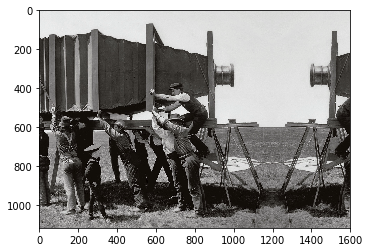

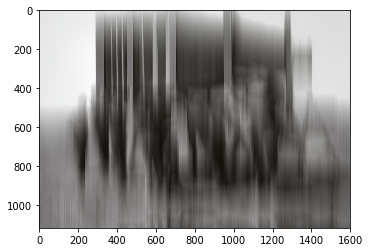

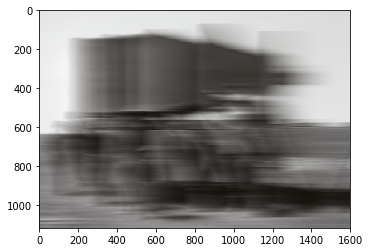

In [0]:
# to be removed for actual handout
# challenge 1
direction = -1 # 0 if right, -1 if left 
k = 400

shift = np.zeros((1, 2*k + 1), dtype=np.float32)
shift[0, direction] = 1.
img_shifted = cv2.filter2D(img, -1, shift)
plt.imshow(img_shifted)
plt.show()

#challenge 2
k = 301
blur = np.zeros((k, 1),np.float32)
for j in range(k):
    blur[j, 0] = j 

blur = blur / np.sum(blur)

blurred_horiz = cv2.filter2D(img,-1,blur)
plt.imshow(blurred_horiz)
plt.show()

blur = np.transpose(blur)

blurred_vert = cv2.filter2D(img,-1,blur)
plt.imshow(blurred_vert)
plt.show()